# Evolving Niches with Noise
## Publication Images

In [ ]:
%load_ext autoreload
%autoreload 2

import logging
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

%aimport -matplotlib
%aimport -pandas
%aimport -seaborn
%aimport -numpy
%aimport -logging
%aimport -os

from dataframe.calculations import specific_generation_over_runs
import visualize.dataframe
import analysis.ks
# plt.style.use(['dark_background'])

logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(threadName)s - %(name)s - %(levelname)s - %(message)s')

rootlogger = logging.getLogger()
f = logging.Filter(name='evolvingniches')
logger = logging.getLogger('evolvingniches.run')
rootlogger.addFilter(f)
logger = logging.getLogger('evolvingniches.jupyter')

In [ ]:
directory_base = '/Users/davk/Documents/phd/projects/EvolvingNiches/data/'
directories = ['20D17_nonoise_300x50', '20D17_g0_c012_i1_300x50',
               '20D22_g300_c012_i1_600x50', '20D23_g300_c012_i1_600x50_b25', '20D23_g300_c012_i1_600x50']
base_runs = [None, None, 104, 125, 105]
experiment_names = ['1','2','3a','3b','3c']

species = [pd.read_parquet(os.path.join(directory_base, d, 'species.parquet')) for d in directories]
spectra = [pd.read_parquet(os.path.join(directory_base, d, 'encoded_spectrum.parquet')) for d in directories]

spectra_ob_fitness = []
for i, (spectrum, specy) in enumerate(zip(spectra,species)):
    gens = range(289,299)
    if i >= 2:
        gens = range(589,599)
    last_10_species = specific_generation_over_runs(gens, data=specy)
    run_role_fitness = last_10_species.groupby(['run','role'])['fitness'].mean()
    run_fitness = run_role_fitness.groupby('run').mean()

    sof = spectrum.join(run_fitness).sort_values(['fitness','generation'], ascending=[False, True])
    sof = sof.drop(columns='fitness')
    spectra_ob_fitness.append(sof)

idx = pd.IndexSlice

## Average of the 50 runs

The plot below shows the average spectra from all 50 runs of each simulation

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `spectra_1_2.pdf'.


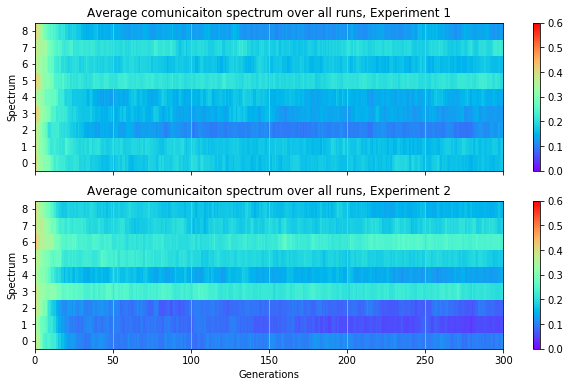

In [20]:
filename = 'spectra_1_2.svg'
pdf_filename = 'spectra_1_2.pdf'

fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10.5,6))
for ax, experiment, spectrum in zip(axes, experiment_names[:2], spectra[:2]):
    plt.sca(ax)
    visualize.dataframe.plot_spectrum(spectrum, vmin=0.0, vmax=0.6, view=False, close=False, filename=None,
                                      title='Average communication spectrum over all runs, Experiment {}'.format(experiment))

axes.flatten()[0].set_xlabel('')

plt.savefig(filename)
!cairosvg {filename} -o {pdf_filename}
!pdfcrop {pdf_filename} {pdf_filename}


PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `spectra_3_4_5.pdf'.


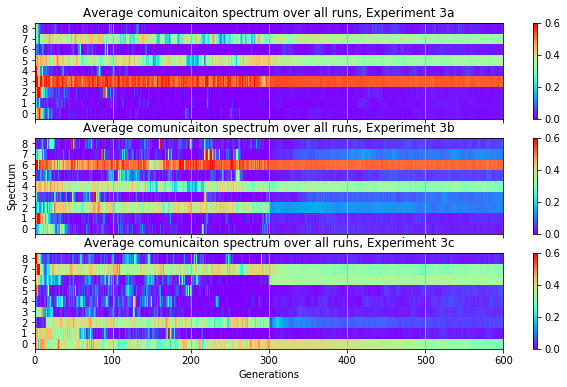

In [21]:
filename = 'spectra_3_4_5.svg'
pdf_filename = 'spectra_3_4_5.pdf'

fig, axes = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(10.5,6))
for ax, experiment, spectrum in zip(axes, experiment_names[2:], spectra[2:]):
    plt.sca(ax)
    visualize.dataframe.plot_spectrum(spectrum, vmin=0.0, vmax=0.6, view=False, close=False, filename=None,
                                      title='Average communication spectrum over all runs, Experiment {}'.format(experiment))

axes.flatten()[0].set_xlabel('')
axes.flatten()[0].set_ylabel('')
axes.flatten()[1].set_xlabel('')
axes.flatten()[2].set_ylabel('')

plt.savefig(filename)
!cairosvg {filename} -o {pdf_filename}
!pdfcrop {pdf_filename} {pdf_filename}

In [ ]:
filename = 'spectra_all.svg'
pdf_filename = 'spectra_all.pdf'

fig = plt.figure(figsize=(10.5,8))
axes
axes.append()
for ax, experiment, spectrum in zip(axes, experiment_names[:2], spectra[:2]):
    plt.sca(ax)
    visualize.dataframe.plot_spectrum(spectrum, vmin=0.0, vmax=0.6, view=False, close=False, filename=None,
                                      title='Average communication spectrum over all runs, Experiment {}'.format(experiment))

axes.flatten()[0].set_xlabel('')

plt.savefig(filename)
!cairosvg {filename} -o {pdf_filename}
!pdfcrop {pdf_filename} {pdf_filename}

## Last 10 generation histograms

Histograms for the last 10 generations of each run

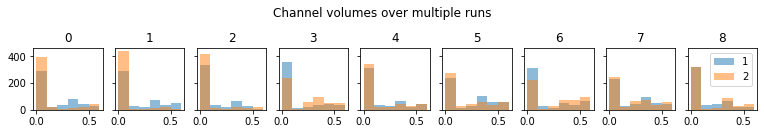

In [4]:
fig, axes = plt.subplots(1, 9, sharex=True, sharey=True, constrained_layout=True, figsize=(10.5,1.75))
fig.suptitle("Channel volumes over multiple runs")
last10_spectra = []
for experiment, spectrum in zip(experiment_names[:2], spectra[:2]):
    channel_volume = specific_generation_over_runs(range(289,299), data=spectrum)
    fig, axes = visualize.dataframe.plot_channel_volume_histogram(channel_volume,
                                                                  view=False, close=False, filename=None,
                                                                  fig=fig, axes=axes,
                                                                  label=experiment, alpha=0.5)
    last10_spectra.append(channel_volume)

plt.legend()
plt.savefig('channel_histogram_constant.svg')
plt.show()
# !cairosvg channel_histogram_constant.svg -o channel_histogram_constant.pdf
# !pdfcrop channel_histogram_constant.pdf channel_histogram_constant.pdf

## Experiment Individual Plots

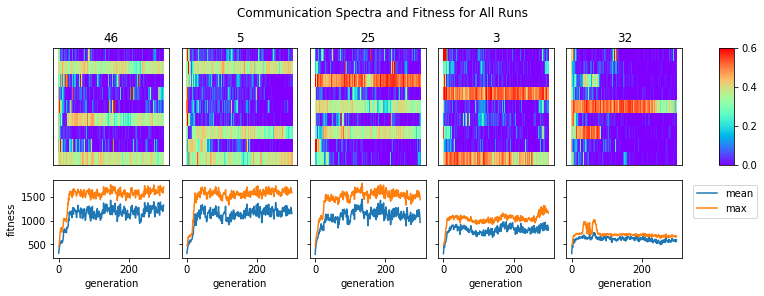

Converting
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `individual_spectra_1.pdf'.


In [22]:
# print('Getting Fitness')
# sof_1 =
# species_1 = species[0]
# # visualize.dataframe.plot_run_spectra(sof_1, vmin=0.0, vmax=1.0, view=True, filename=None, shape=(10, 5), numbering=True)
#
# print('Making plots')
# visualize.dataframe.plot_run_spectra(sof_1.loc[selected_runs], vmin=0.0, vmax=0.6, view=True, filename='individual_spectra_1.svg', shape=(2, 3), numbering=True, figsize=(15,8.5))

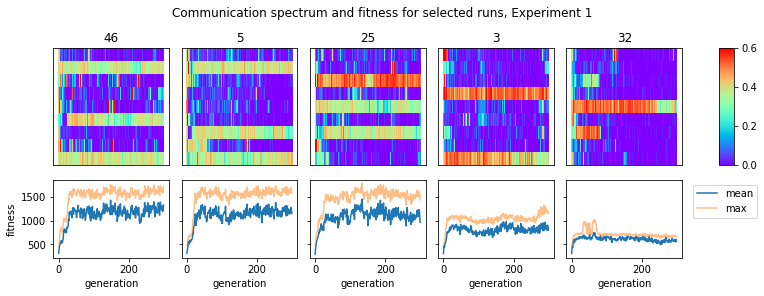

Converting
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `individual_spectra_1.pdf'.
Converting
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `individual_spectra_2.pdf'.
Converting
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `individual_spectra_3a.pdf'.
Converting
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `individual_spectra_3b.pdf'.
Converting
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `individual_spectra_3c.pdf'.


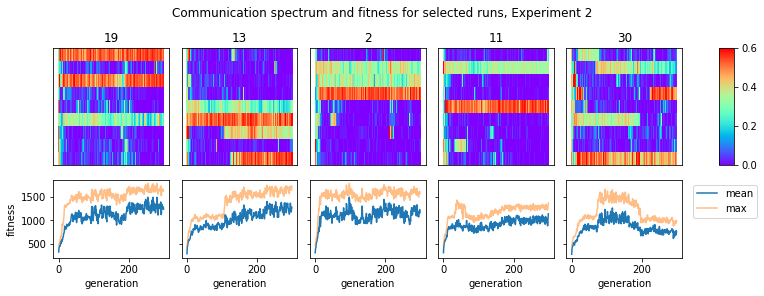

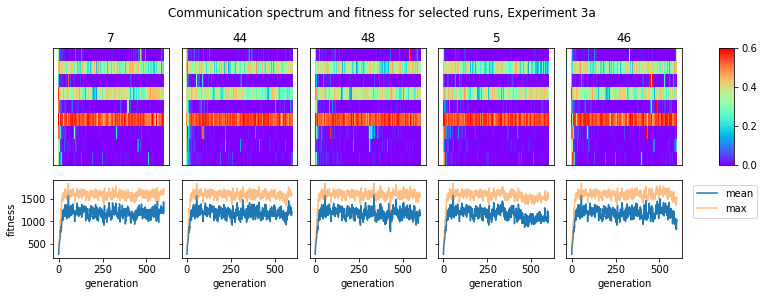

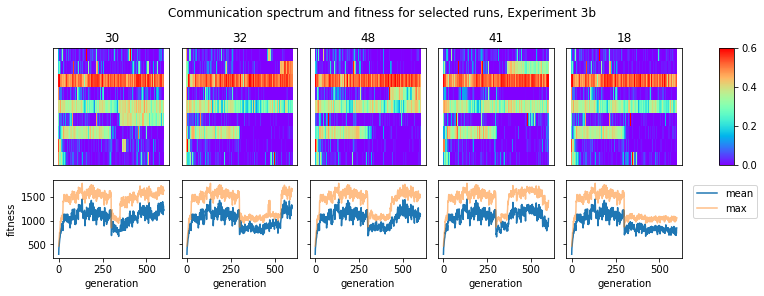

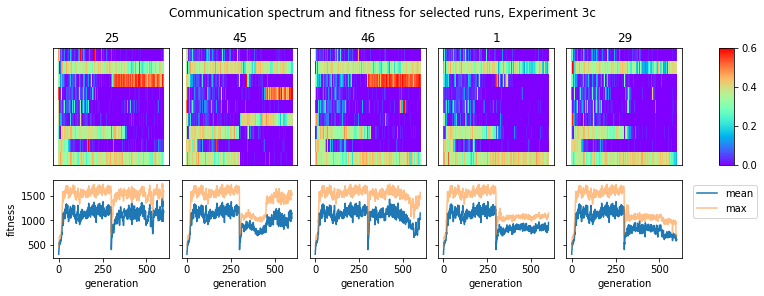

In [10]:
selected_runs_list = [
    [46, 5, 25, 3, 32],
    [19, 13, 2, 11, 30],
    [7, 44, 48, 5, 46],
    [30, 32, 48, 41, 18],
    [25, 45, 46, 1, 29]w
]

for n in range(5):
    base_run = base_runs[n]
    name = experiment_names[n]
    filename = 'individual_spectra_{}.svg'.format(name)
    pdf_filename = 'individual_spectra_{}.pdf'.format(name)
    selected_runs = selected_runs_list[n]

    selected_spec = spectra_ob_fitness[n].loc[selected_runs+[base_run]]
    selected_fit = species[n].loc[selected_runs+[base_run]]
    visualize.dataframe.plot_spectra_and_fitness(selected_spec, selected_fit, base_run=base_run,
                        vmin=0.0, vmax=0.6, view=True, filename=filename, shape=(2,5),
                        numbering=True, figsize=(10.5,4),
                        title="Communication spectrum and fitness for selected runs, Experiment {}".format(name))

    print('Converting')
    !cairosvg {filename} -o {pdf_filename}
    !pdfcrop {pdf_filename} {pdf_filename}

## KS Matrix Calculation

Probably not used in the final.

In [6]:
# both_runs_spectra = pd.concat(last10_spectra, axis=1)
#
# ks_stat, ks_p = analysis.ks.kolmogorov_smirnov_matrix(both_runs_spectra)
#
# stat_cluster_centers_indices, stat_labels = analysis.ks.kolmogorov_smirnov_clusters(ks_stat)
# p_cluster_centers_indices, p_labels = analysis.ks.kolmogorov_smirnov_clusters(ks_p)

## Constant Noise Fitness

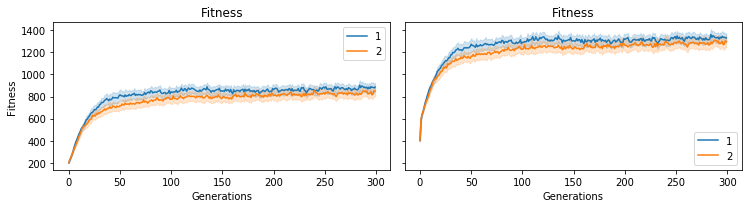

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `constant_noise_fitness.pdf'.


In [19]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10.5,3), sharex=True, sharey=True)
plt.sca(ax1)
for experiment, specy in zip(experiment_names[:2], species[:2]):
    visualize.dataframe.plot_species_fitness(specy, species=0, role='sender', only_mean=True,
                                             view=False, filename=None, close=False, label=experiment)

# plt.legend()
# plt.savefig('constant_noise_fitness_sender.svg')
# plt.show()
# !cairosvg constant_noise_fitness_sender.svg -o constant_noise_fitness_sender.pdf
# !pdfcrop constant_noise_fitness_sender.pdf constant_noise_fitness_sender.pdf

# fig = plt.figure(figsize=(10.5,5))
plt.sca(ax2)
for experiment, specy in zip(experiment_names[:2], species[:2]):
    visualize.dataframe.plot_species_fitness(specy, species=0, role='receiver', only_mean=True,
                                             view=False, filename=None, close=False, label=experiment)

plt.legend()
plt.savefig('constant_noise_fitness.svg')
plt.show()
!cairosvg constant_noise_fitness.svg -o constant_noise_fitness.pdf
!pdfcrop constant_noise_fitness.pdf constant_noise_fitness.pdf


## All Experiments Fitness

2020-05-02 12:34:47,258 - MainThread - matplotlib.legend - WARNING - No handles with labels found to put in legend.


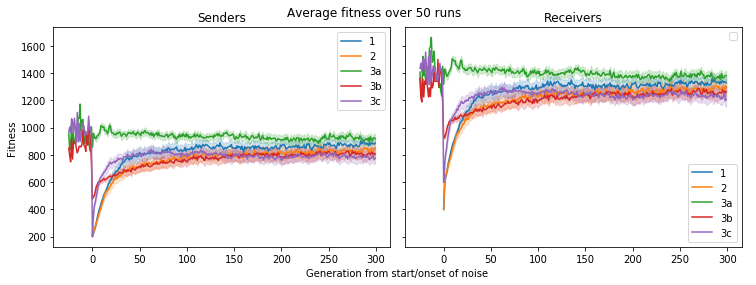

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `fitness.pdf'.


In [22]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10.5,4), sharex=True, sharey=True)

for i, (experiment, specy) in enumerate(zip(experiment_names, species)):
    if i >= 2:
        specy = specy.loc[idx[:,range(275,600)], :]
        specy = specy.reset_index()
        specy['generation'] -= 300
        specy = specy.set_index(['run','generation','species','role'])

    plt.sca(ax1)
    visualize.dataframe.plot_species_fitness(specy, species=0, role='sender', only_mean=True,
                                             view=False, filename=None, close=False, label=experiment)
    plt.sca(ax2)
    visualize.dataframe.plot_species_fitness(specy, species=0, role='receiver', only_mean=True,
                                             view=False, filename=None, close=False, label=experiment)

ax1.set_title('Senders')
ax1.set_xlabel('')
ax2.set_title('Receivers')
ax2.set_xlabel('')
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.xlabel('Generation from start/onset of noise')
fig.suptitle('Average fitness over 50 runs')

plt.legend()
plt.savefig('fitness.svg')
plt.show()
!cairosvg fitness.svg -o fitness.pdf
!pdfcrop fitness.pdf fitness.pdf


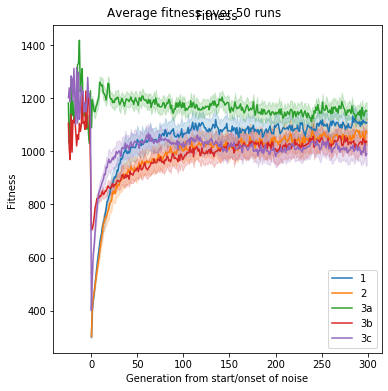

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `combined-fitness.pdf'.


In [31]:
fig, ax = plt.subplots(1,1,figsize=(5.5,5.5))

for i, (experiment, specy) in enumerate(zip(experiment_names, species)):
    if i >= 2:
        idx = pd.IndexSlice
        specy = specy.loc[idx[:,range(275,600)], :]
        specy = specy.reset_index()
        specy['generation'] -= 300
        specy = specy.set_index(['run','generation','species','role'])

    mean_role_fitness = specy.groupby(['role']).mean()['fitness']
    fitness = specy['fitness']
    fitness.div(mean_role_fitness, level='role')
    fitness = fitness.groupby(['run','generation','species']).mean()

    visualize.dataframe.plot_species_fitness(fitness, species=0, only_mean=True,
                                             view=False, filename=None, close=False, label=experiment)

ax.set_xlabel('Generation from start/onset of noise')
# fig.add_subplot(111, frame_on=False)
fig.suptitle('Average fitness over 50 runs')

plt.legend()
plt.savefig('combined-fitness.svg')
plt.show()
!cairosvg combined-fitness.svg -o combined-fitness.pdf
!pdfcrop combined-fitness.pdf combined-fitness.pdf

## Subspecies counts

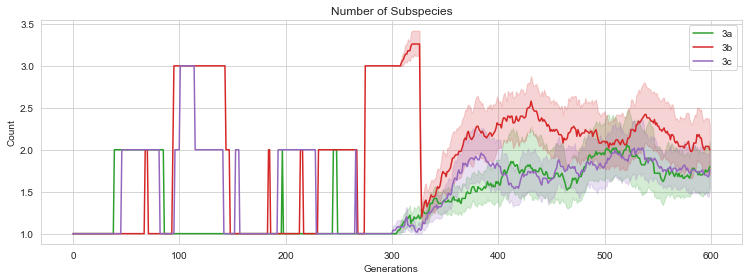

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `n_subspecies_sender.pdf'.


In [ ]:
for role in ['sender', 'receiver']:
    with sns.color_palette(sns.color_palette()[2:]):
        fig, axis = plt.subplots(1, 1, figsize=(10.5,4))
        for experiment, specy in zip(experiment_names[2:], species[2:]):
            visualize.dataframe.plot_subspecies_count(specy, role=role, view=False, filename=None, close=False, label=experiment)

        filename = 'n_subspecies_{}.svg'.format(role)
        pdf_filename = 'n_subspecies_{}.pdf'.format(role)
        plt.legend()
        plt.savefig(filename)
        plt.show()

        !cairosvg {filename} -o {pdf_filename}
        !pdfcrop {pdf_filename} {pdf_filename}

## Network stats

In [ ]:
sns.set_style("whitegrid")

for role in ['sender', 'receiver']:
    fig, axes = plt.subplots(1, 2, figsize=(10.5,4), sharey=True)
    for experiment, specy in zip(experiment_names[:2], species[:2]):
        visualize.dataframe.plot_network_stats(specy, role=role, view=False, filename=None, close=False, axes=axes, label=experiment)

    filename = 'network_stats_constant_{}.svg'.format(role)
    pdf_filename = 'network_stats_constant_{}.pdf'.format(role)
    plt.legend()
    plt.savefig(filename)
    plt.show()

    !cairosvg {filename} -o {pdf_filename}
    !pdfcrop {pdf_filename} {pdf_filename}

In [25]:
sns.set_style("whitegrid")

# paired = sns.color_palette('Paired')
# paired = paired[:2] + paired[6:8] + paired[2:6] + paired[8:]

for role in ['sender', 'receiver']:
    with sns.color_palette(sns.color_palette()[2:]):
        fig, axes = plt.subplots(1, 2, figsize=(10.5,5), sharey=True)
        for experiment, specy in zip(experiment_names[2:], species[2:]):
            visualize.dataframe.plot_network_stats(specy, role=role, view=False, filename=None, close=False, axes=axes, label=experiment)

        filename = 'network_stats_{}.svg'.format(role)
        pdf_filename = 'network_stats_{}.pdf'.format(role)
        plt.legend()
        plt.savefig(filename)
        plt.show()

        !cairosvg {filename} -o {pdf_filename}
        !pdfcrop {pdf_filename} {pdf_filename}



TypeError: len() of unsized object

TypeError: len() of unsized object

<Figure size 756x216 with 2 Axes>

## Fitness non-linearity function

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `nonlin-fitness.pdf'.


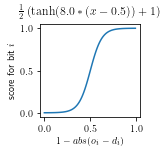

In [7]:
plt.rc('text', usetex=True)
fig, ax = plt.subplots(1,1,figsize=(2.25,2.25))
x = np.arange(0.0,1.0,0.01)
y = (np.tanh(8.0 * (x - 0.5)) + 1.0) / 2.0
data = pd.DataFrame(y, index=x)
sns.lineplot(data=data, legend=False)
plt.xlabel('$ 1 - abs( o_i - d_i ) $')
plt.ylabel('score for bit $i$')
plt.title(r'$\frac{1}{2} \left(\tanh(8.0 * (x - 0.5)) + 1\right)$')

plt.tight_layout()

filename = 'nonlin-fitness.svg'
pdf_filename = 'nonlin-fitness.pdf'
plt.savefig(filename)
!cairosvg {filename} -o {pdf_filename}
!pdfcrop {pdf_filename} {pdf_filename}

   n correct  multiplier
0          0       1.000
1          1       1.100
2          2       1.320
3          3       1.716
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `multiplier.pdf'.


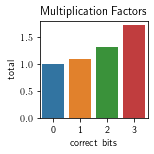

In [10]:
plt.rc('text', usetex=True)
fig, ax = plt.subplots(1,1,figsize=(2.25,2.25))
x = range(4)
y = [1.0, 1.0*1.1, 1.0*1.1*1.2, 1.0*1.1*1.2*1.3]
data = pd.DataFrame({'n correct': x, 'multiplier': y})
print(data)
sns.barplot(x='n correct', y='multiplier', data=data)
plt.xlabel('correct bits')
plt.ylabel('total')
plt.title('Multiplication Factors')

plt.tight_layout()

filename = 'multiplier.svg'
pdf_filename = 'multiplier.pdf'
# plt.show()
plt.savefig(filename)
!cairosvg {filename} -o {pdf_filename}
!pdfcrop {pdf_filename} {pdf_filename}



## Run fitness by experiment violin plots
### Mean
This shows the average fitness for each of the 50 runs for each experiment.

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `violin.pdf'.


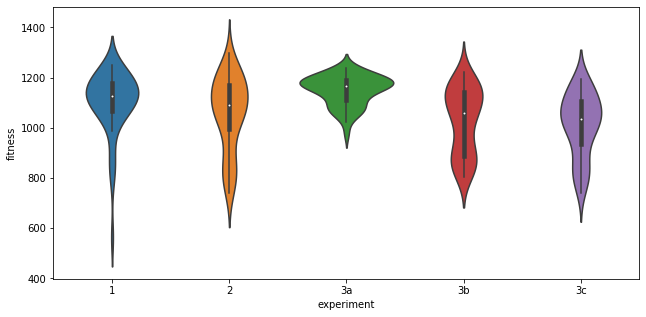

In [5]:
fig, ax = plt.subplots(1,1,figsize=(10.5,5))
# fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(8.5,8.5), sharex=True, sharey=True)
# plt.sca(ax1)
# run_fitnesses = []
# for i, (name, specy) in enumerate(zip(experiment_names,species)):
#     r = range(250,300)
#     if i >=2 :
#         r = range(450,600)
#     run_fitness = specy.groupby(['run','generation']).mean().loc[idx[:,r],'fitness'].groupby(['run']).max().reset_index()
#     run_fitness['experiment'] = name
#     run_fitnesses.append(run_fitness)
#
# fitnesses = pd.concat(run_fitnesses)
#
# sns.violinplot(x='experiment', y='fitness', data=fitnesses)
#
# plt.sca(ax2)
run_fitnesses = []
for i, (name, specy) in enumerate(zip(experiment_names,species)):
    r = range(250,300)
    if i >=2 :
        r = range(450,600)
    run_fitness = specy.groupby(['run','generation']).mean().loc[idx[:,r],'fitness'].groupby(['run']).mean().reset_index()
    run_fitness['experiment'] = name
    run_fitnesses.append(run_fitness)

fitnesses = pd.concat(run_fitnesses)

sns.violinplot(x='experiment', y='fitness', data=fitnesses)
#
# plt.sca(ax3)
# run_fitnesses = []
# for i, (name, specy) in enumerate(zip(experiment_names,species)):
#     r = range(250,300)
#     if i >=2 :
#         r = range(450,600)
#     run_fitness = specy.groupby(['run','generation']).mean().loc[idx[:,r],'fitness'].groupby(['run']).min().reset_index()
#     run_fitness['experiment'] = name
#     run_fitnesses.append(run_fitness)
#
# fitnesses = pd.concat(run_fitnesses)
#
# sns.violinplot(x='experiment', y='fitness', data=fitnesses)

# ax1.set_title('Max')
# ax2.set_title('Mean')
# ax3.set_title('Min')
# ax1.set_xlabel('')
# ax2.set_xlabel('')
# ax1.set_ylabel('')
# ax3.set_ylabel('')

filename = 'violin.svg'
pdf_filename = 'violin.pdf'
# plt.show()
plt.savefig(filename)
!cairosvg {filename} -o {pdf_filename}
!pdfcrop {pdf_filename} {pdf_filename}


